In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# creating dataframe to read the csv file
df = pd.read_csv('employee_retention.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [7]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df['Work_accident'].unique()

array([0, 1])

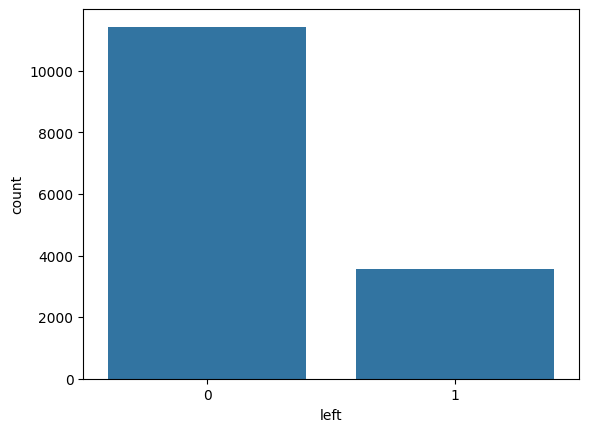

In [9]:
#  checking number of employees who left
sns.countplot(x='left',data=df)
plt.show()

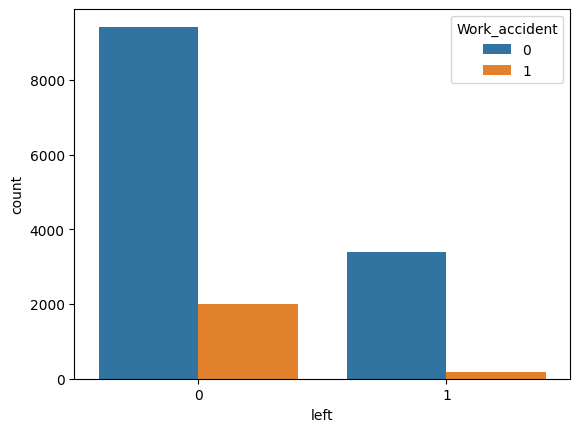

In [10]:
# checking the effect of work accident on the leving of employees
sns.countplot(x='left',hue='Work_accident' ,data=df)
plt.show()


<Axes: xlabel='number_project', ylabel='count'>

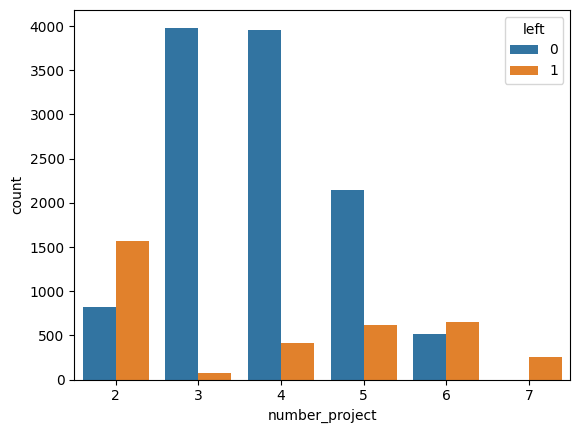

In [11]:
sns.countplot(x='number_project', hue = 'left', data=df)

<Axes: xlabel='left', ylabel='count'>

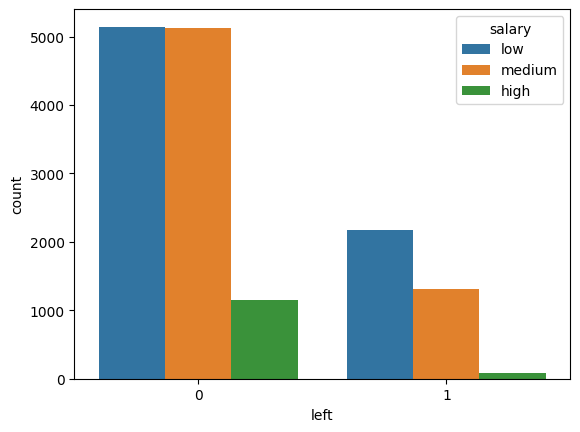

In [12]:
sns.countplot(x='left', hue = 'salary', data=df)

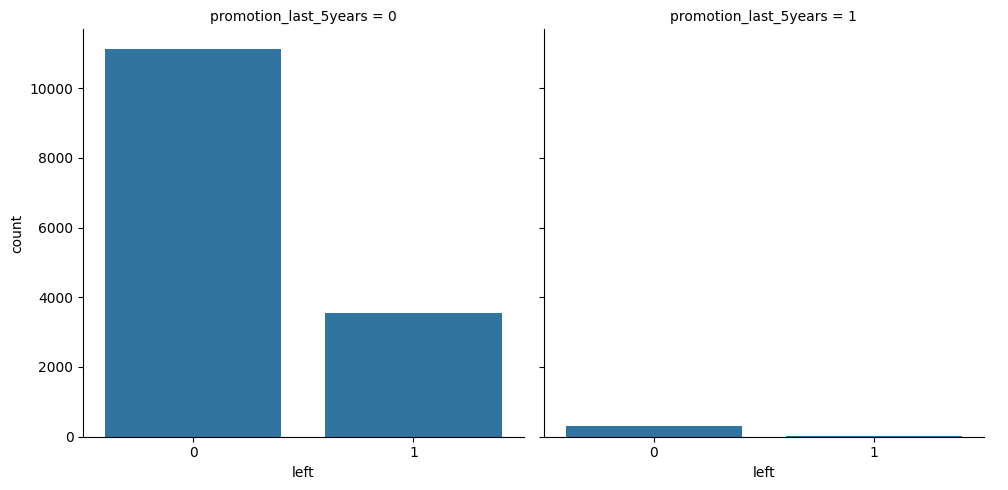

In [13]:
sns.catplot(x='left', col = 'promotion_last_5years', kind='count', data=df)

In [14]:
df.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

<Axes: xlabel='left', ylabel='satisfaction_level'>

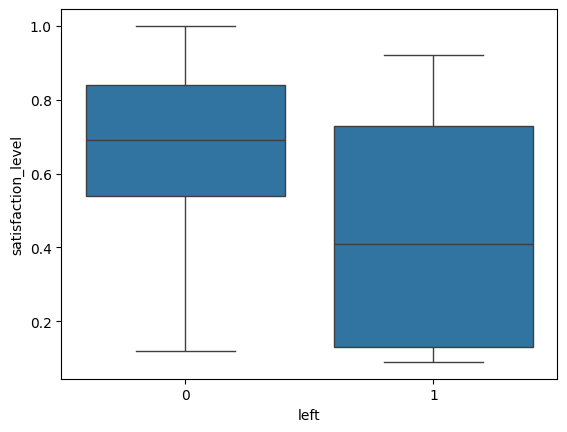

In [15]:
sns.boxplot(x='left', y= 'satisfaction_level', data= df)

<Axes: xlabel='left', ylabel='average_montly_hours'>

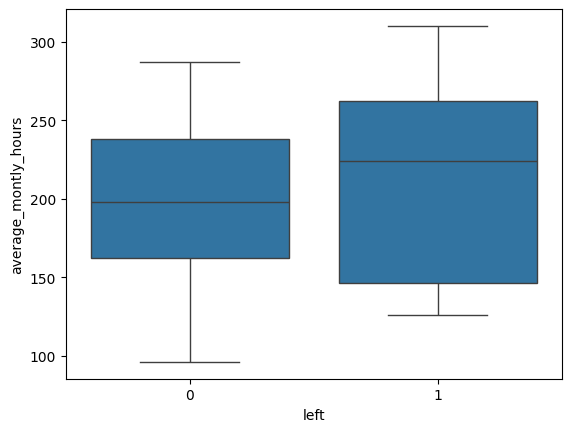

In [16]:
sns.boxplot(x='left', y= 'average_montly_hours', data= df)

In [19]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

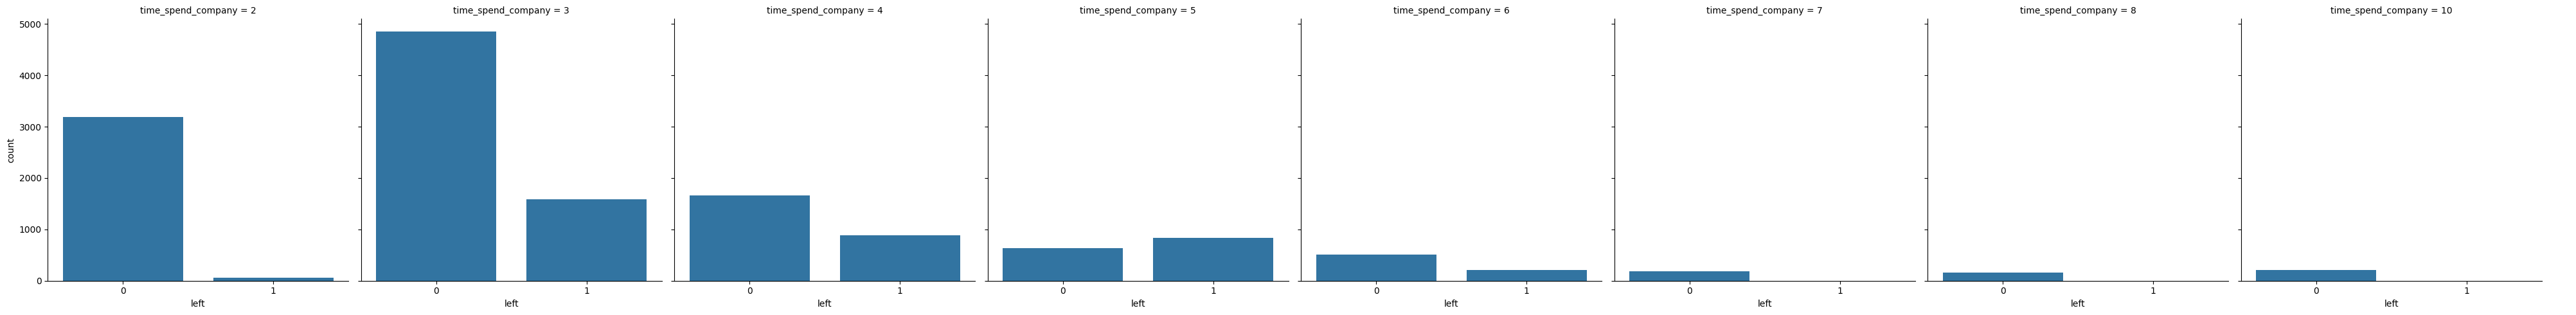

In [17]:

sns.catplot(x='left', col = 'time_spend_company', kind='count', data=df)

<Axes: xlabel='time_spend_company', ylabel='count'>

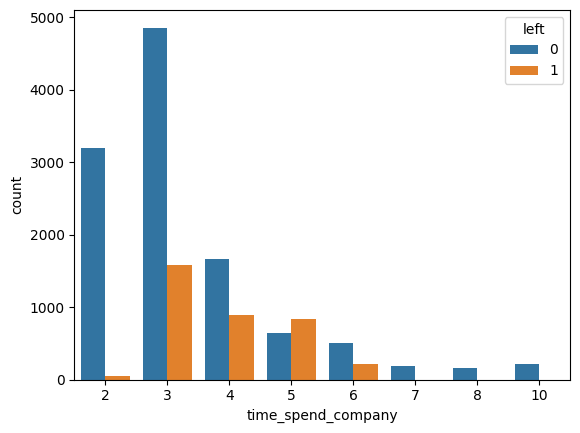

In [18]:
sns.countplot(x='time_spend_company', hue='left',data=df)

In [20]:
df.last_evaluation

0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
         ... 
14994    0.57
14995    0.48
14996    0.53
14997    0.96
14998    0.52
Name: last_evaluation, Length: 14999, dtype: float64

<Axes: xlabel='left', ylabel='last_evaluation'>

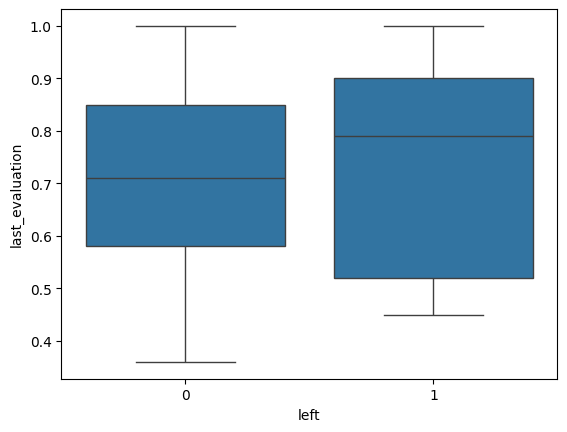

In [21]:
sns.boxplot(x='left',y='last_evaluation', data=df)

In [22]:
df['last_evaluation'].head()

0    0.53
1    0.86
2    0.88
3    0.87
4    0.52
Name: last_evaluation, dtype: float64

In [ ]:
column_value = df.get('low')
if column_value is None:
    print("Column 'low' does not exist in the dataframe.")
else:
    print(column_value.dtype)




In [29]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col)


salary


In [31]:
df["salary"] = pd.to_numeric(df["salary"], errors="coerce")

<Axes: >

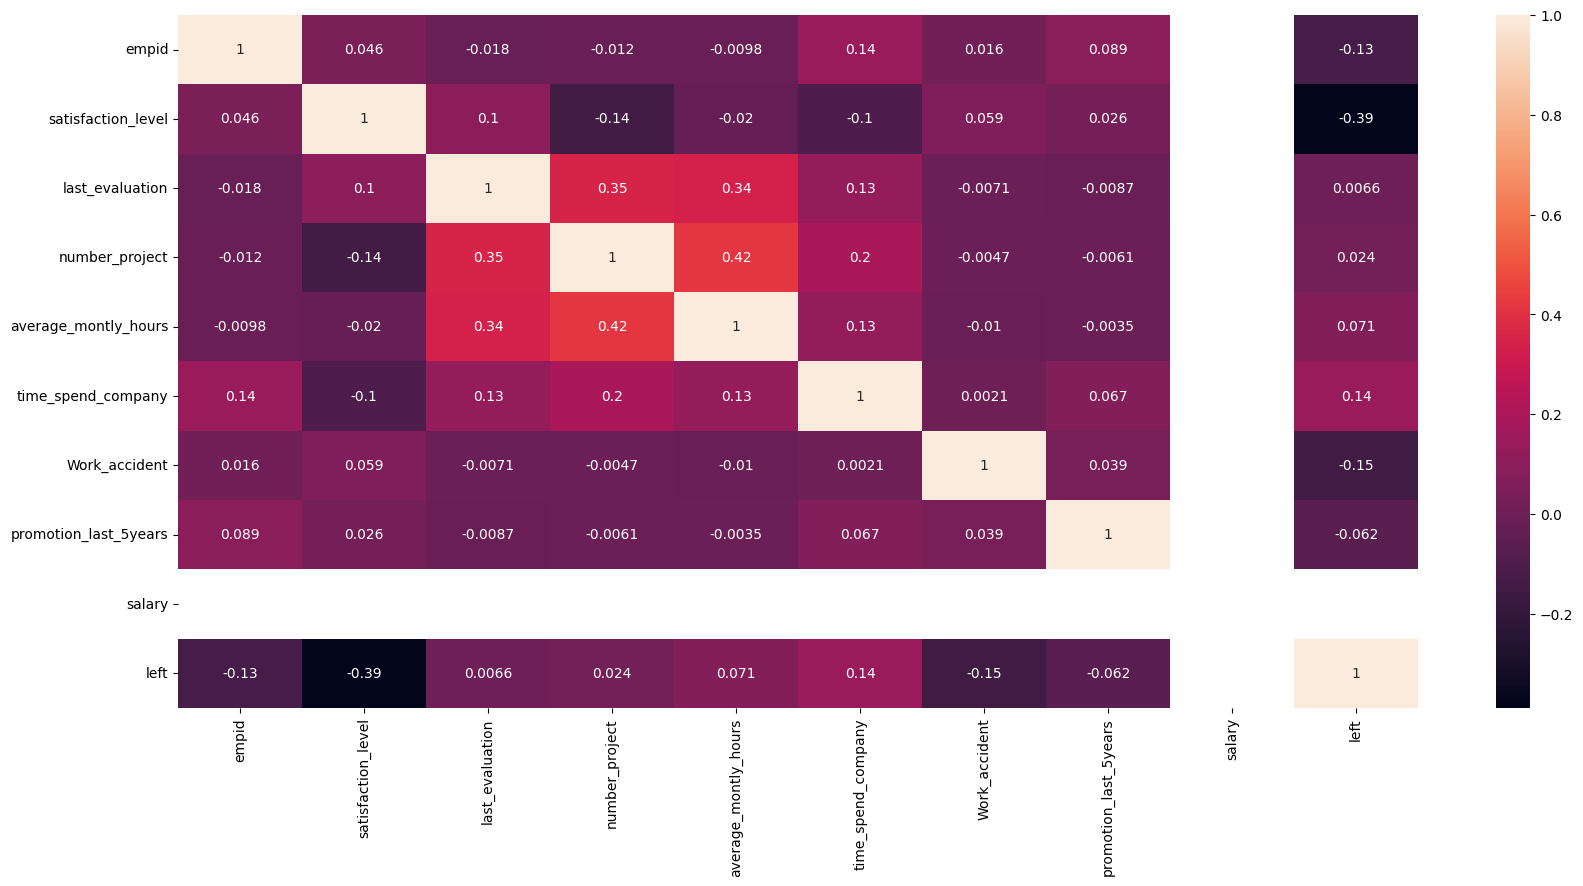

In [32]:
correlation = df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(correlation,annot=True)


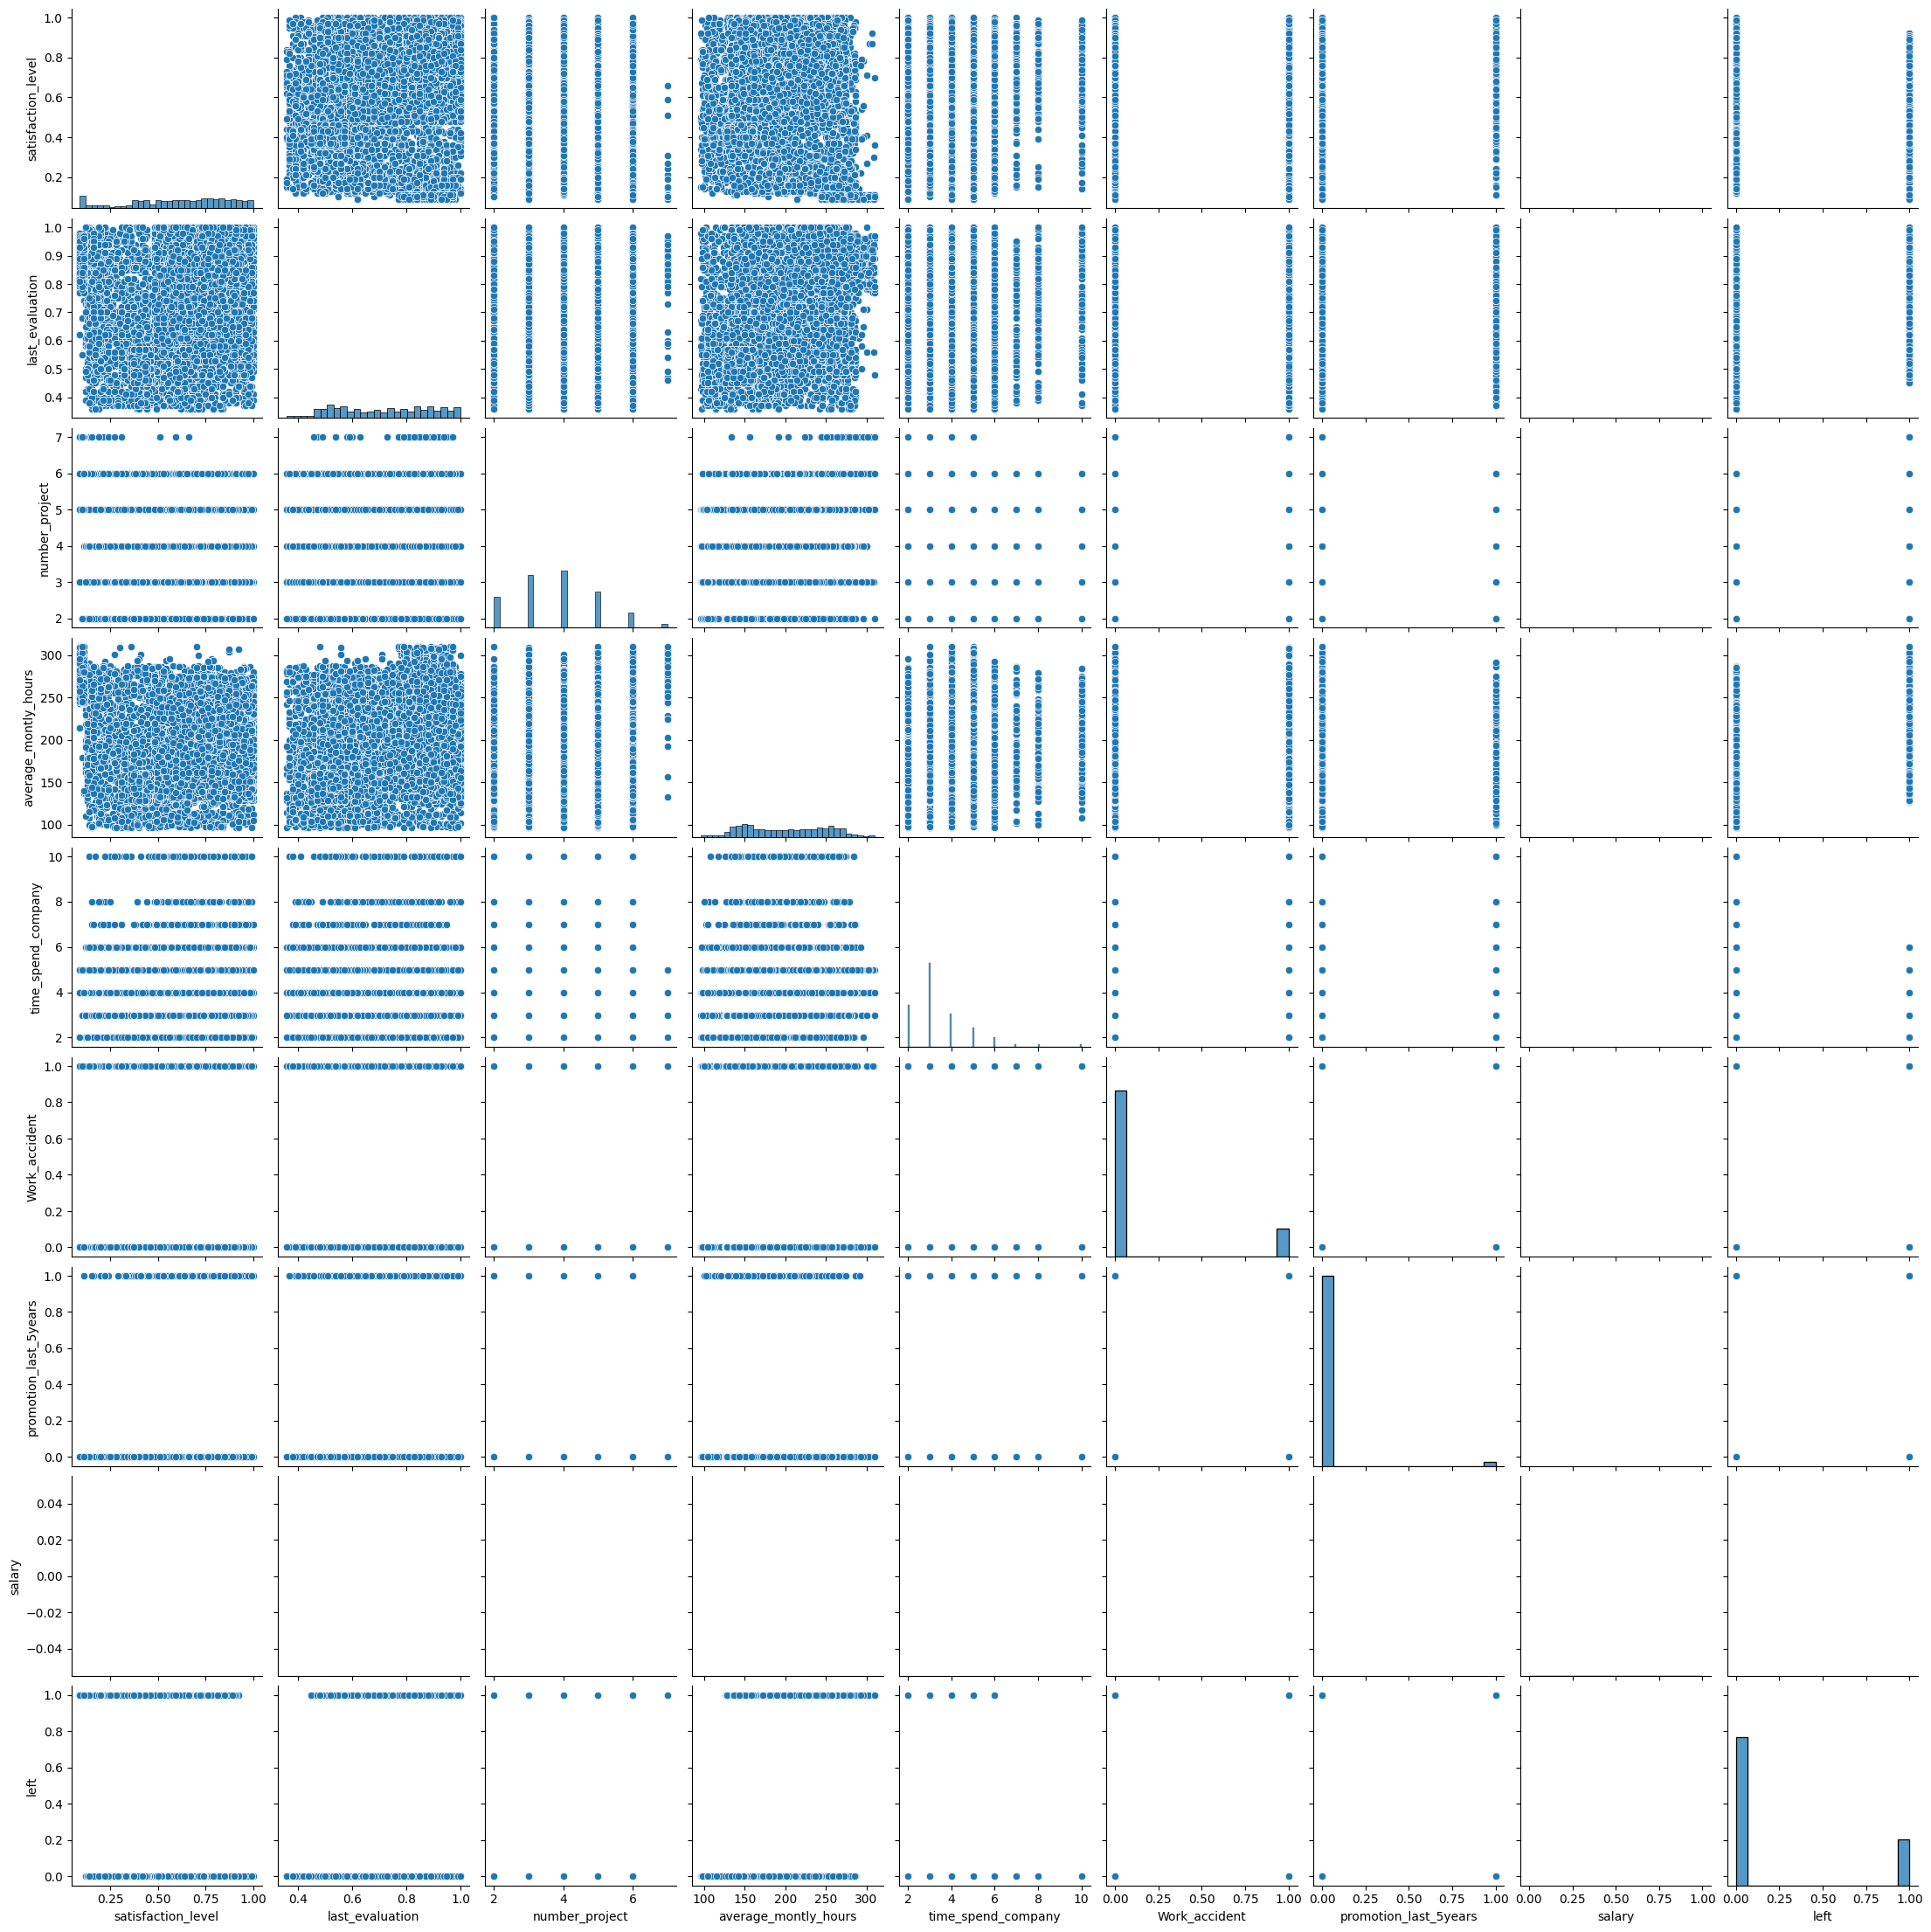

In [36]:
sns.pairplot(df)

# Feature engineering

In [34]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,NaN,1
1,2,0.80,0.86,5,262,6,0,0,NaN,1
2,3,0.11,0.88,7,272,4,0,0,NaN,1
3,4,0.72,0.87,5,223,5,0,0,NaN,1
4,5,0.37,0.52,2,159,3,0,0,NaN,1


In [35]:
df.drop('empid',inplace=True, axis = 1)

In [37]:
df.shape

(14999, 9)

In [38]:
df2 = df.copy()

In [39]:
df2.isnull().sum()

satisfaction_level           2
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
promotion_last_5years        0
salary                   14999
left                         0
dtype: int64

In [40]:
df.satisfaction_level.head()

0    0.38
1    0.80
2    0.11
3    0.72
4    0.37
Name: satisfaction_level, dtype: float64

In [41]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [42]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)

In [43]:
df2.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
promotion_last_5years        0
salary                   14999
left                         0
dtype: int64

In [44]:
# handling categorical features
df2.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary                   float64
left                       int64
dtype: object

In [45]:
df2.salary.unique()

array([nan])

In [46]:
salary_dummy = pd.get_dummies(df2['salary'],drop_first=True)

In [47]:
df2 = pd.concat([df2, salary_dummy],axis=1)

In [48]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,NaN,1
1,0.80,0.86,5,262,6,0,0,NaN,1
2,0.11,0.88,7,272,4,0,0,NaN,1
3,0.72,0.87,5,223,5,0,0,NaN,1
4,0.37,0.52,2,159,3,0,0,NaN,1


In [49]:
df2.drop('salary', inplace=True, axis=1)

In [50]:
df2.shape

(14999, 8)

In [51]:
# scaloing of numerical data
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [52]:
cols_to_scale = ['average_montly_hours','time_spend_company','number_project']

In [53]:
df2[cols_to_scale] = minmax.fit_transform(df2[cols_to_scale])

In [54]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,0.0,0.285047,0.125,0,0,1
1,0.80,0.86,0.6,0.775701,0.500,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,0,1
4,0.37,0.52,0.0,0.294393,0.125,0,0,1


In [55]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,NaN,1
1,0.80,0.86,5,262,6,0,0,NaN,1
2,0.11,0.88,7,272,4,0,0,NaN,1
3,0.72,0.87,5,223,5,0,0,NaN,1
4,0.37,0.52,2,159,3,0,0,NaN,1


In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14997 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 0 non-null      float64
 8   left                   14999 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.0 MB


In [91]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,0.0,0.285047,0.125,0,0,1
1,0.80,0.86,0.6,0.775701,0.500,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,0,1
4,0.37,0.52,0.0,0.294393,0.125,0,0,1


# Splitting training and testing data

In [56]:
# splitting data
X = df2.drop('left', axis = 1)
y = df2['left']

In [57]:
X.shape

(14999, 7)

In [58]:
y.shape

(14999,)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 0)

In [60]:
X_train.shape, y_train.shape

((11999, 7), (11999,))

# Model selection

In [61]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [62]:
# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [63]:
model_parameters = {
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [10,50,100,130],
            'criterion' :['gini','entropy'],
            'max_depth' : range(2,4,1),
            'max_features' : ['auto','log2']

        }
    },
    'XGBClassifier' : {
        'model' : XGBClassifier(),
        'param': {
            'n_estimators': [10,50,100,200],
            'learning_rate': [0.5,0.1,0.01,0.001],
            'max_depth' : [3,5,10,20]

        }
    }
}

In [65]:
scores = []
for model_name, mp in model_parameters.items():
    mod_select = GridSearchCV(mp['model'], mp['param'], cv = 5, return_train_score=False)
    mod_select.fit(X,y)
    scores.append({
        'model' : model_name,
        'best_score' : mod_select.best_score_,
        'best_parameters' : mod_select.best_params_

    })

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [66]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9252641102589753,
  'best_parameters': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9902661553851283,
  'best_parameters': {'learning_rate': 0.1,
   'max_depth': 20,
   'n_estimators': 200}}]

Hence, we got that Xgboost performs better than RandomForest in this case. The GridSearchCV also provided the optimal hyperparameters. So, lets build the model accordingly

# Model Building

In [67]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 20,n_estimators = 200)

In [68]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
model.score(X_test,y_test)

0.992

In [82]:
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
cm = confusion_matrix(y_test, y_pred)

In [74]:
accuracy_score(y_test,y_pred)

0.992

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


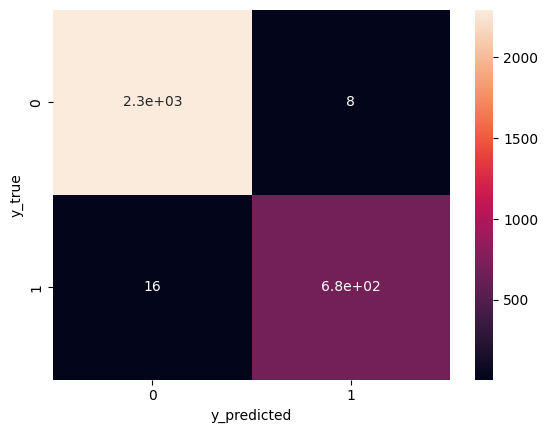

In [76]:
sns.heatmap(cm, annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

In [85]:
import pickle

In [86]:
# Saving model to disk
pickle.dump(model, open('model1.pkl','wb'))

In [87]:
# Loading model to compare the results
mod = pickle.load(open('model1.pkl','rb'))
a = mod.predict(X_test)
accuracy_score(y_test,a)

0.992